In [21]:
# --- 1. IMPOR LIBRARY ---

# Library dasar untuk data & plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk pemrosesan teks (NLP)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Library untuk machine learning (Scikit-learn)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Semua library berhasil di-impor.")

# --- 2. DOWNLOAD RESOURCE NLTK ---

def download_nltk_resources(resources):
    """
    Memeriksa dan mengunduh resource NLTK yang diperlukan.
    """
    print("Memeriksa ketersediaan resource NLTK...")
    for res in resources:
        try:
            # Coba cari resource
            nltk.data.find(f'corpora/{res}')
            print(f"   [OK] Resource '{res}' sudah ada.")
        except LookupError:
            # Download jika tidak ditemukan
            print(f"   [INFO] Resource '{res}' tidak ditemukan. Mengunduh...")
            nltk.download(res, quiet=True)
    print("--- Resource NLTK siap digunakan. ---")

# Definisikan resource yang dibutuhkan
RESOURCES_TO_DOWNLOAD = ['stopwords', 'wordnet', 'omw-1.4']

# Jalankan fungsi download
download_nltk_resources(RESOURCES_TO_DOWNLOAD)

# --- 3. FUNGSI HELPER ---

def load_data(file_path):
    """
    Memuat data review dari file CSV.
    Jika file tidak ditemukan, buat dan gunakan sample data.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"Sukses memuat data dari '{file_path}'.")
    except FileNotFoundError:
        print(f"Error: File '{file_path}' tidak ditemukan. Membuat sample data...")
        # Data sampel jika file tidak ada
        data = {
            'review': [
                'this movie was amazing and wonderful',
                'this was a terrible and boring movie',
                'i absolutely loved it',
                'i hated every minute of it',
                'the film was not good at all',
                'what a fantastic experience',
                'it was okay but could be better',
                'the storyline was dull and predictable',
                'brilliant acting and great plot',
                'worst movie ever seen'
            ],
            'sentiment': [
                'positive', 'negative', 'positive', 'negative',
                'negative', 'positive', 'neutral', 'negative',
                'positive', 'negative'
            ]
        }
        df = pd.DataFrame(data)

    return df

print("Fungsi load_data() siap digunakan.")

# --- 4. EKSEKUSI UTAMA (STEP 1) ---

# Atur style plot seaborn
sns.set(style='whitegrid')

# Definisikan path file
DATA_FILE_PATH = '../data/reviews.csv'

# Muat data menggunakan fungsi yang sudah kita buat
df = load_data(DATA_FILE_PATH)

# Tampilkan 5 baris pertama dari data (di Jupyter, `df.head()` lebih baik dari `print(df.head())`)
print("\nData Awal (5 Baris Pertama):")
df.head()

Semua library berhasil di-impor.
Memeriksa ketersediaan resource NLTK...
   [OK] Resource 'stopwords' sudah ada.
   [INFO] Resource 'wordnet' tidak ditemukan. Mengunduh...
   [INFO] Resource 'omw-1.4' tidak ditemukan. Mengunduh...
--- Resource NLTK siap digunakan. ---
Fungsi load_data() siap digunakan.
Sukses memuat data dari 'reviews.csv'.

Data Awal (5 Baris Pertama):


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Membuat plot distribusi sentimen...


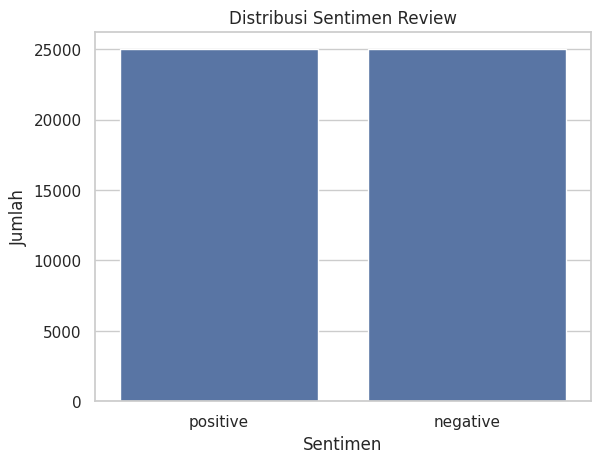

Fungsi preprocess_text() siap digunakan.
Menjalankan preprocessing pada kolom 'review'...
Proses ini mungkin memakan waktu jika data besar.
Preprocessing selesai.
Contoh data setelah preprocessing (5 baris pertama):


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [22]:
# --- 5. EKSPLORASI DATA (EDA) ---

print("Membuat plot distribusi sentimen...")

# Menggunakan sns.countplot untuk menghitung dan memplot frekuensi
sns.countplot(x='sentiment', data=df)

# Menambahkan judul dan label
plt.title('Distribusi Sentimen Review')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

# --- 6. FUNGSI PREPROCESSING TEKS ---

# Inisialisasi lemmatizer & stopwords sekali saja di luar fungsi
# Ini jauh lebih efisien daripada membuatnya di dalam fungsi
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Fungsi untuk membersihkan dan memproses teks review:
    1. Menghapus tag HTML
    2. Lowercasing
    3. Menghapus non-alfabet
    4. Menghapus stopwords
    5. Lemmatization
    """
    # 1. Menghapus tag HTML (tambahan baru)
    # re.sub akan mencari pola <...> dan menggantinya dengan spasi
    text = re.sub(r'<[^>]+>', ' ', text)

    # 2. Lowercasing
    text = text.lower()

    # 3. Menghapus karakter selain huruf dan spasi
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 4. Tokenisasi
    words = text.split()

    # 5. Lemmatization dan penghapusan stopwords
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]

    return ' '.join(words)

print("Fungsi preprocess_text() siap digunakan.")

# --- 7. APLIKASIKAN PREPROCESSING ---

print("Menjalankan preprocessing pada kolom 'review'...")
print("Proses ini mungkin memakan waktu jika data besar.")

# Menerapkan fungsi ke setiap baris di kolom 'review'
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("Preprocessing selesai.")

# --- 8. LIHAT HASIL PREPROCESSING ---

print("Contoh data setelah preprocessing (5 baris pertama):")

# Tampilkan kolom 'review' asli dan 'cleaned_review' baru secara berdampingan
df[['review', 'cleaned_review']].head()

In [23]:
# --- 9. FEATURE ENGINEERING (TF-IDF) ---

# 1. Inisialisasi TF-IDF Vectorizer
# max_features=8000: Ambil 8000 fitur (kata/ngram) terpenting
# ngram_range=(1,2): Gunakan unigram (1 kata) dan bigram (2 kata)
tfidf = TfidfVectorizer(max_features=8000, ngram_range=(1, 2))

# 2. Pisahkan fitur (X) dan target (y)
# X adalah teks yang sudah dibersihkan
# y adalah label sentimen
X = df['cleaned_review']
y = df['sentiment']

# 3. Terapkan TF-IDF (Fit & Transform)
# 'fit_transform' mempelajari kosa kata (vocabulary) dari X
# dan mengubah X menjadi matriks TF-IDF.
print("Menerapkan TF-IDF Vectorizer...")
X_tfidf = tfidf.fit_transform(X)

print("Transformasi TF-IDF selesai.")
print("\nBentuk (Shape) dari Matriks TF-IDF:")
print(f"(Jumlah review, Jumlah fitur): {X_tfidf.shape}")

Menerapkan TF-IDF Vectorizer...
Transformasi TF-IDF selesai.

Bentuk (Shape) dari Matriks TF-IDF:
(Jumlah review, Jumlah fitur): (50000, 8000)


In [24]:
# --- 10. MEMBAGI DATASET (TRAIN & TEST SPLIT) ---

print("Membagi data menjadi training dan testing set...")

# Bagi data
# test_size=0.2: 20% data untuk testing
# random_state=42: Untuk hasil yang konsisten/reproducible
# stratify=y: Memastikan proporsi sentimen (positif/negatif/netral)
#             sama di train dan test set.
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data berhasil dibagi:")
print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test:  {X_test.shape}")

# --- 11. SELEKSI FITUR (MENGURANGI NOISE) ---

# Kita gunakan Chi-Square (chi2) untuk menemukan fitur terbaik
# 'k' adalah jumlah fitur yang ingin kita simpan
# Kita ambil 4000 fitur, atau jumlah total fitur jika kurang dari 4000
k_features = min(4000, X_tfidf.shape[1])

print(f"Memilih {k_features} fitur terbaik menggunakan Chi-Square...")

selector = SelectKBest(chi2, k=k_features)

# Fit hanya pada data training
X_train_sel = selector.fit_transform(X_train, y_train)

# Transform data testing (tanpa fit ulang)
X_test_sel = selector.transform(X_test)

print("Seleksi fitur selesai.")
print(f"Bentuk X_train baru: {X_train_sel.shape}")
print(f"Bentuk X_test baru:  {X_test_sel.shape}")

# --- 12. PELATIHAN MODEL (HYPERPARAMETER TUNING) ---

print("Memulai proses Hyperparameter Tuning dengan GridSearchCV...")

# 1. Tentukan parameter yang ingin diuji
param_grid = {
    'C': [0.1, 1, 5, 10],            # Mengontrol kekuatan regularisasi
    'solver': ['liblinear', 'lbfgs'], # Algoritma optimasi
    'class_weight': [None, 'balanced'] # Menangani data tidak seimbang (jika ada)
}

# 2. Inisialisasi GridSearchCV
# estimator: Model yang digunakan (Logistic Regression)
# param_grid: Parameter yang ingin diuji
# cv=5: 5-fold cross-validation
# scoring='accuracy': Metrik yang digunakan untuk evaluasi
# n_jobs=-1: Gunakan semua core CPU untuk mempercepat proses
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 3. Latih model pada data training yang sudah diseleksi
# Proses ini mungkin memakan waktu...
grid.fit(X_train_sel, y_train)

print("--- Pelatihan selesai. ---")

# --- 13. HASIL HYPERPARAMETER TUNING ---

print("Hasil terbaik dari GridSearchCV:")
print(f"Parameter Terbaik: {grid.best_params_}")
print(f"Akurasi Cross-Validation Terbaik: {grid.best_score_:.4f}")

# Simpan model terbaik ke dalam variabel
best_model = grid.best_estimator_

print("\nVariabel 'best_model' siap digunakan untuk evaluasi.")

Membagi data menjadi training dan testing set...
Data berhasil dibagi:
Bentuk X_train: (40000, 8000)
Bentuk X_test:  (10000, 8000)
Memilih 4000 fitur terbaik menggunakan Chi-Square...
Seleksi fitur selesai.
Bentuk X_train baru: (40000, 4000)
Bentuk X_test baru:  (10000, 4000)
Memulai proses Hyperparameter Tuning dengan GridSearchCV...
--- Pelatihan selesai. ---
Hasil terbaik dari GridSearchCV:
Parameter Terbaik: {'C': 5, 'class_weight': None, 'solver': 'lbfgs'}
Akurasi Cross-Validation Terbaik: 0.8931

Variabel 'best_model' siap digunakan untuk evaluasi.


Membuat prediksi pada data testing...
Prediksi selesai.
Akurasi Model Final: 0.8943

Laporan Klasifikasi (Classification Report):
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Membuat plot Confusion Matrix...


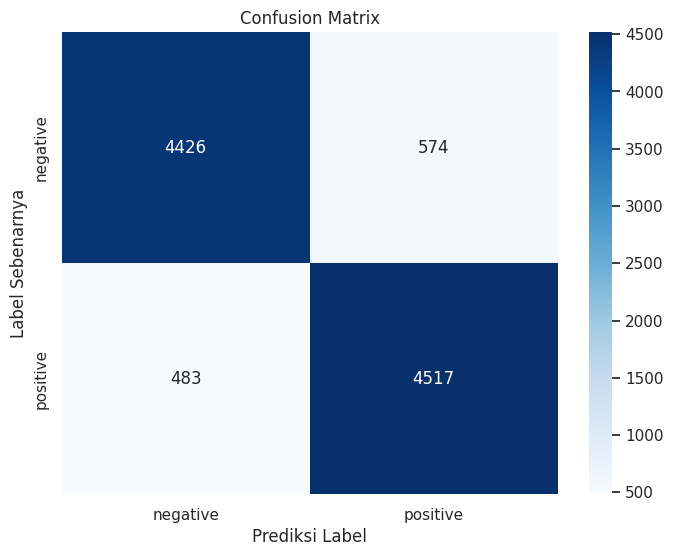

In [25]:
# --- 14. EVALUASI MODEL: MEMBUAT PREDIKSI ---

print("Membuat prediksi pada data testing...")

# Gunakan model terbaik untuk memprediksi label data X_test_sel
y_pred = best_model.predict(X_test_sel)

print("Prediksi selesai.")

# --- 15. EVALUASI MODEL: LAPORAN TEKSTUAL ---

# 1. Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Final: {accuracy:.4f}")

# 2. Menampilkan laporan klasifikasi (precision, recall, f1-score)
print("\nLaporan Klasifikasi (Classification Report):")
# 'zero_division=0' untuk menghindari error jika ada kelas
# yang tidak terprediksi sama sekali
print(classification_report(y_test, y_pred, zero_division=0))

# --- 16. EVALUASI MODEL: VISUAL (CONFUSION MATRIX) ---

print("Membuat plot Confusion Matrix...")

# 1. Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Dapatkan label kelas dari model (mis: ['negative', 'neutral', 'positive'])
class_labels = best_model.classes_

# 3. Buat heatmap menggunakan seaborn
plt.figure(figsize=(8, 6)) # Atur ukuran plot
sns.heatmap(
    cm,
    annot=True,     # Tampilkan angka di dalam kotak
    fmt='d',        # Format angka sebagai integer
    cmap='Blues',   # Skema warna
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.xlabel('Prediksi Label')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# --- 17. SIMPAN SEMUA OBJEK UNTUK PREDIKSI ---

import joblib
import os

# Tentukan folder output
output_dir = '../models'
os.makedirs(output_dir, exist_ok=True)
print(f"Folder penyimpanan disiapkan di: {output_dir}")

# 1. Tentukan nama file
model_filename = 'sentiment_model.joblib'
tfidf_filename = 'tfidf_vectorizer.joblib'    # File untuk vectorizer
selector_filename = 'feature_selector.joblib' # File untuk selector

# 2. Tentukan path lengkap
model_path = os.path.join(output_dir, model_filename)
tfidf_path = os.path.join(output_dir, tfidf_filename)
selector_path = os.path.join(output_dir, selector_filename)

# 3. Simpan ketiga objek
joblib.dump(best_model, model_path)
joblib.dump(tfidf, tfidf_path)
joblib.dump(selector, selector_path)

print(f"Model berhasil disimpan di: {model_path}")
print(f"Vectorizer berhasil disimpan di: {tfidf_path}")
print(f"Selector berhasil disimpan di: {selector_path}")

Folder penyimpanan disiapkan di: ../models
Model berhasil disimpan di: ../models/sentiment_model.joblib
Vectorizer berhasil disimpan di: ../models/tfidf_vectorizer.joblib
Selector berhasil disimpan di: ../models/feature_selector.joblib
